In [1]:
import pandas as pd
import numpy as np

In [22]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

def drawKorea(targetData, blockedMap, d1, d2, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    BORDER_LINES = [
        [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
        [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
        [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
         (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
        [(9, 12), (9, 10), (8, 10)], # 강원도
        [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
         (13, 4), (14, 4), (14, 2)], # 충청남도
        [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
         (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
        [(14, 4), (15, 4), (15, 6)], # 대전시
        [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
        [(14, 8), (16, 8), (16, 10), (15, 10),
         (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
        [(15, 11), (16, 11), (16, 13)], # 울산시
        [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
        [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
        [(18, 5), (20, 5), (20, 6)], # 전라남도
        [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
    ]

    mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(7, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'

        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
        if row[d1].endswith('시') and not row[d1].startswith('세종'):
            dispname = '{}\n{}'.format(row[d1][:2], row[d2][:-1])
            if len(row[d2]) <= 2:
                dispname += row[d2][-1]
        else:
            dispname = row[d2][:-1]

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)
        
    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=4)

    plt.gca().invert_yaxis()
    #plt.gca().set_aspect(1)

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    
    save_img = '스쿨버스운영비율.png'
    plt.savefig(save_img)
    
    plt.show()

In [2]:
raw_kindergarten = pd.read_excel('/Users/hankiho/Desktop/빅데이터_공모전_원본데이터(유치원)/원본/전국어린이집표준데이터.xls',
              encoding='utf-8')

In [4]:
raw_kindergarten['어린이집유형구분'].value_counts()

가정        24165
민간        18136
국공립        3786
사회복지법인     2231
직장         1299
법인·단체      1053
협동          172
Name: 어린이집유형구분, dtype: int64

In [5]:
from pyecharts import Pie, Style

attr = ['가정','민간','국공립','사회복지법인','직장','법인·단체','협동']
v1 = [24165, 18136, 3786, 2231, 1299, 1053, 172]

pie = Pie("유치원 타입 종류", title_pos="right", width=600)
pie.add("C", attr, v1, center=[40, 50], is_random=True, 
        radius=[30, 75], rosetype='radius',
        is_legend_show=False,is_label_show=True)
pie

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/Users/hankiho/anaconda3/lib/python3.6/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


In [2]:
df = pd.read_csv('/Users/hankiho/Desktop/빅데이터_공모전_원본데이터(유치원)/빅데이터_공모전_최종엑셀 (결측치 근처 값처리).csv',
                      encoding = 'cp949')

In [8]:
#유아교육법에는 유치원 입학 연령이 ‘만3세부터 취학 전까지의 유아’라고 정의되어 있습니다
df.head(1)

,광역시도,행정구역,주소,shortName,x,y,유치원_정원_수,유치원_보육교직원_수,유치원_보육실_수,놀이터_수,유치원_CCTV설치_수,스쿨버스_운영비율,0~7세 인구수,3~7세 인구수
0,강원도,강릉시,강원도 강릉시,강릉,11,4,47.555901,7.940994,4.586957,0.769231,5.770186,0.729814,11025,7717.5


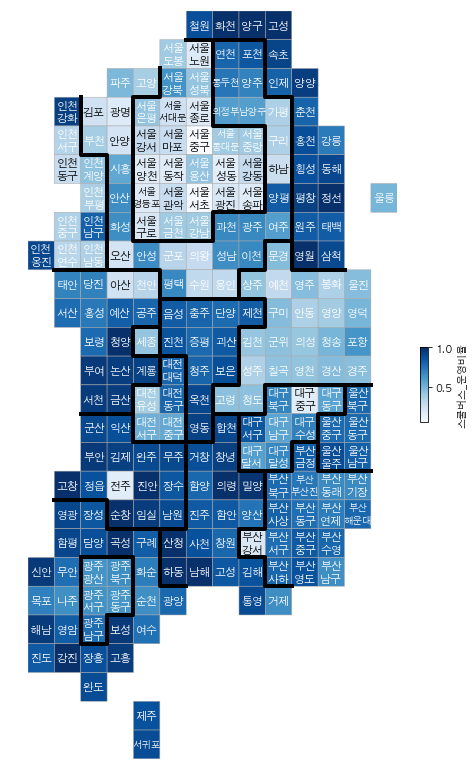

In [23]:
drawKorea('스쿨버스_운영비율', df, '광역시도', '행정구역', 'Blues')

In [3]:
df['놀이터 비율'] = df['놀이터_수'] / df['유치원_정원_수'] 
df['부모님 안심 지수'] = df['유치원_CCTV설치_수'] / df['유치원_정원_수'] * df['유치원_정원_수'] 
#취원율 = (해당연령층의 취원자 수/유치원 적령아동수) *100
df['취원율'] = df['3~7세 인구수'] / df['유치원_정원_수'] * 100
df['유아환경지수'] = df['유치원_보육실_수'] / df['유치원_정원_수'] * df['유치원_보육교직원_수'] 

In [4]:
df.to_csv("df_kindergarten.csv", mode='w',encoding='ms949')

In [5]:
df_new_index = df[['광역시도','행정구역','주소','shortName','x','y',
    '놀이터 비율','부모님 안심 지수','취원율','유아환경지수']].round(2)

In [6]:
df_new_index.head(1)

,광역시도,행정구역,주소,shortName,x,y,놀이터 비율,부모님 안심 지수,취원율,유아환경지수
0,강원도,강릉시,강원도 강릉시,강릉,11,4,0.02,5.77,16228.27,0.77


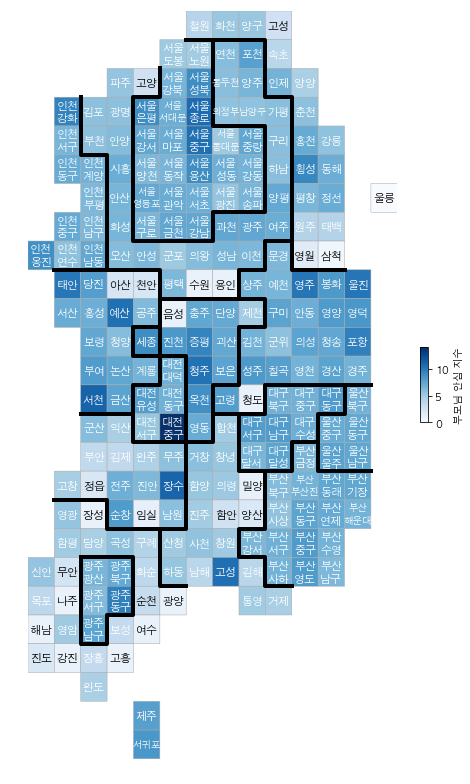

In [13]:
drawKorea('부모님 안심 지수',df_new_index, '광역시도', '행정구역', 'Blues')

In [20]:
df_new_index.head(1) 

,광역시도,행정구역,주소,shortName,x,y,놀이터 비율,부모님 안심 지수,취원율,유아환경지수
0,강원도,강릉시,강원도 강릉시,강릉,11,4,0.02,5.77,16228.27,0.77


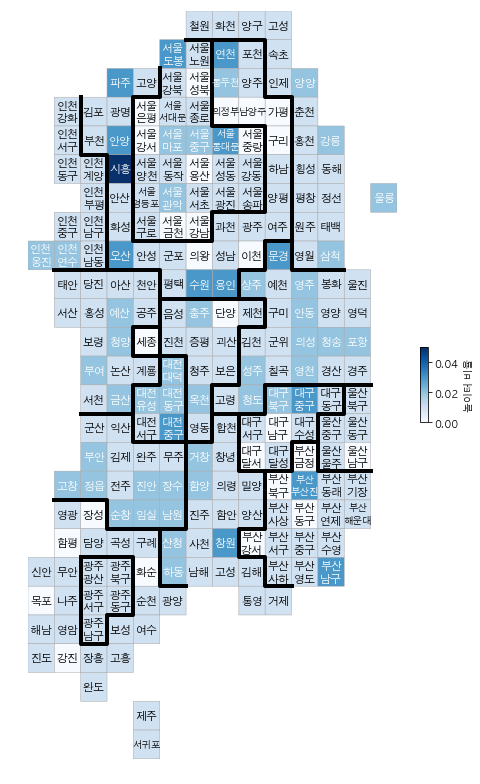

In [21]:
drawKorea('놀이터 비율',df_new_index, '광역시도', '행정구역', 'Blues')

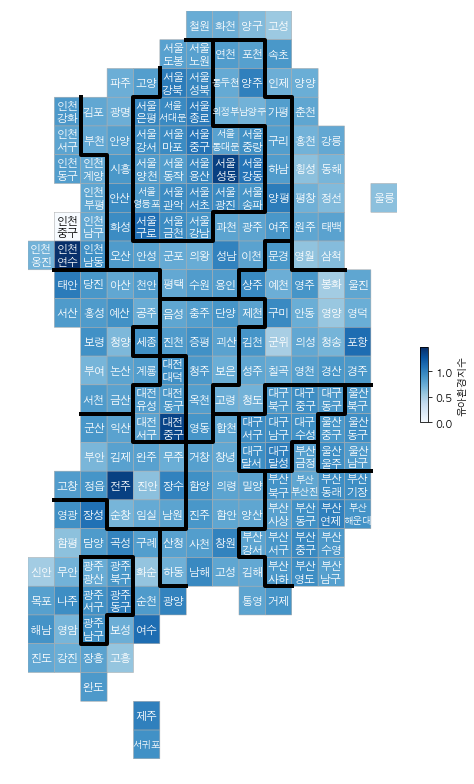

In [19]:
drawKorea('유아환경지수',df_new_index, '광역시도', '행정구역', 'Blues')

/Users/hankiho/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


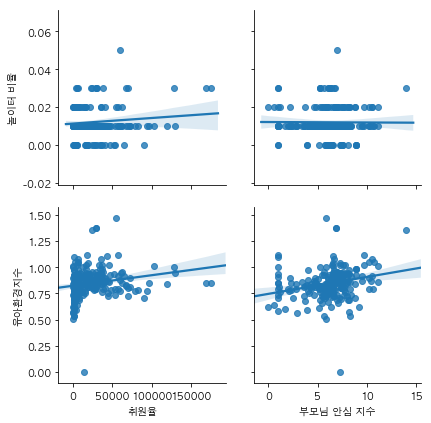

In [27]:
import seaborn as sns

sns.pairplot(df_new_index, x_vars=['취원율','부모님 안심 지수'], 
             y_vars=['놀이터 비율','유아환경지수'], kind='reg', size=3)
plt.show()